# Calibration Pipeline

Over each observation the temperature of LTM could vary, causing changes to the background instrument radiance seen by the detector. This is part of the offset A, which will no longer be constant if the instrument temperature varies. Similarly, if the detector changes temperature, the gain G of the pixels can also change. To correct this, each term is assumed to be linear in time t over the observation as follows:

$$ A(t) = Astart + (\frac{A_{end} - A_{start}}{\Delta t}) \tag{18} $$

$$ G(t) = Gstart + (\frac{G_{end} - G_{start}}{\Delta t}) \tag{19}$$

A and G must be measured before and after the observation, where $\Delta t$ is total time between the starting and ending calibration measurements.

This means that for each observation LTM makes measurements as follows:

1. View of the internal calibration target $V_1$, with measured temperature $T_1$.
2. View of space $V_2$, with temperature $T_2 \approx 0$.
3. View of target $V_3$, with unknown temperature $T_{moon}$.
4. View of the internal calibration target $V_4$, with measured temperature $T_4$.
5. View of space $V_5$, with temperature $T_5 \approx 0$.

These measurements are inputs to the calibration pipeline shown in Figure 9. For each view, the uncorrected detector measurement is as follows:

$$ V_{view} = a + b \left( B_{view} + S_{view} - \frac{2\pi}{\Omega_{scene}} \int \tau_{det} B_\lambda (T_{det}(t_{view})) \, d\lambda \right) \tag{20}$$

Where:

$$ B_{view} = \int r^6_{mirrors} \tau_{det} \tau_{filter} \epsilon_{view} B_\lambda (T_{view}) \, d\lambda \tag{21} $$

In each of the views there is a different stray light signal, and different contribution due to the detector temperature. Row correction is applied to remove the detector emitted radiance by subtracting the change in masked pixels for each of the views. This makes each measurement linear to the effective radiance \( B_{view} \), which includes stray light.

In each of the views there is a different stray light signal, and different contribution due to the detector temperature. Row correction is applied to remove the detector emitted radiance by subtracting the change in masked pixels for each of the views. This makes each measurement linear to the effective radiance \( B_{\text{view}} \), which includes stray light.

$$ V_{\text{view}} = A + G \times B_{\text{view}} \tag{22} $$

$$ B_{\text{view}} = \int r^6_{mirrors} \, \tau_{\text{det}} \, \tau_{\text{filter}} \, \epsilon_{\text{target}} \, B_\lambda (T_{\text{view}}) \, d\lambda + S_{\text{view}} \tag{23} $$

To calculate the offset and gain, the effective radiance of each calibration view must be known. The LTM radiometric model, stray light model, and measured temperature of the internal calibration target are used to calculate this. The gain and offset can then be calculated from the views. The start and end values from views 1, 2, and 4, 5 respectively:

$$ G_{\text{start}} = \frac{V_1' - V_2'}{B_1' - B_2'} \tag{24} $$

$$ A_{\text{start}} = V_2' - G_{\text{start}} B_2' \tag{25} $$

With the gain and offset known, the effective target radiance is calculated:

$$ B_{\text{target}}' = \frac{V_3 - A(t)}{B(t)} \tag{26} $$

The final correction is to remove stray light, leaving the calibrated target radiance at the detector \( B_{\text{target}} \). This is not typically a simple subtraction, as in general the stray light is dependent on the radiance of the target that is being derived, as well as uncertain out-of-field contributions. The correction used for LTM is discussed in the stray light section, but is of the general form:

$$ B_{\text{target}}' = B_{\text{target}} + S_{\text{target}}(B_{\text{target}}) \tag{27} $$

From the calibrated radiance, a calibrated brightness temperature for each channel can be calculated from a lookup table, calculated using:

$$ B_{\text{filter}}(T) = \int r^6_{mirrors} \, \tau_{\text{det}} \, \tau_{\text{filter}} \, B_\lambda (T) \, d\lambda \tag{28} $$

## Notes from Rory: 

- Channel mapping to get tdi frames (reduce the 288) - radcal_index.channelmap - sum channel over 3rd dimension (channels)
- Element wise multiplication with channel map will provide weighted response for each channel
- **Ask Henry** need to get detector configuration file on which row start counting and the width of the channels
- Cannot assume that each 15x384 frame is the same - have decimatation within the instrument and this needs to be set by calibration data --> *How?*
- **Ask Henry** Which filters are in which location? Basically, did this change between the detector -> FPGA -> HDF5

## Stray Light: 
- Assuming stray light is linear with NEP = spectral integrated irradiance
- Calibration testing looked to find the bands of each channel and then did magic to guess and check out the stray light contribution. 
- There are two contributions to stray light:
      - Reflection off of the filter assembly/mirror
      - Reflection off of the bottom of the masked pixels tape
- To do the stray light correction, use the calculated table of stray light averaged over all channels. This is proportional to calibrated radiance in center of image but need to think about how it should be applied to decimated TDI images (*can you add all extra pixels and average out effect?*)


In [ ]:
# Show an overview of data being used from Rory's calibration testing:
from ltm_functions import import_caltest_datatables
import_caltest_datatables()

In [ ]:
# output_dir =  './ltm_data/'
# # file_path = output_dir + 'pre-svt-nadir-map-10.hdf5'

# file_path = output_dir + 'pre-svt-nadir-map-580.hdf5'
# # file_path = output_dir + 'pre-svt-ride-along.hdf5'
# # file_path = output_dir + 'pre-svt-limb-scan.hdf5'
# # file_path = output_dir + 'offset-sweep-2025-01-13T16-56-31.h5' --> NO calibration data?
# 

file_path = 'ltm-simulated-data/pre-svt-nadir-map-499.hdf5'
# file_path = './ltm-calibration-data/ltm-cal-ext-29.h5' 

from ltm_model import LTM_Model
from ltm_radcal import RadCal

Loading calibration data from ./ltm-calibration-data/ltm-cal-ext-10.h5
Original Int -> bb_look11: shape (16, 288, 384)
Loaded Int -> bb_look11: shape (16, 288, 384)
Original Cold -> cs_look11: shape (16, 288, 384)
Loaded Cold -> cs_look11: shape (16, 288, 384)
Original Hot -> scene: shape (16, 288, 384)
Loaded Hot -> scene: shape (16, 288, 384)
Data successfully loaded from ./ltm-calibration-data/ltm-cal-ext-10.h5
Shape of temperature dependent gain table: (288, 384)
Shape of temperature dependent gain table: (288, 384)
Shape of temperature dependent gain table: (288, 384)
Plotting Internal Calibration Looks:



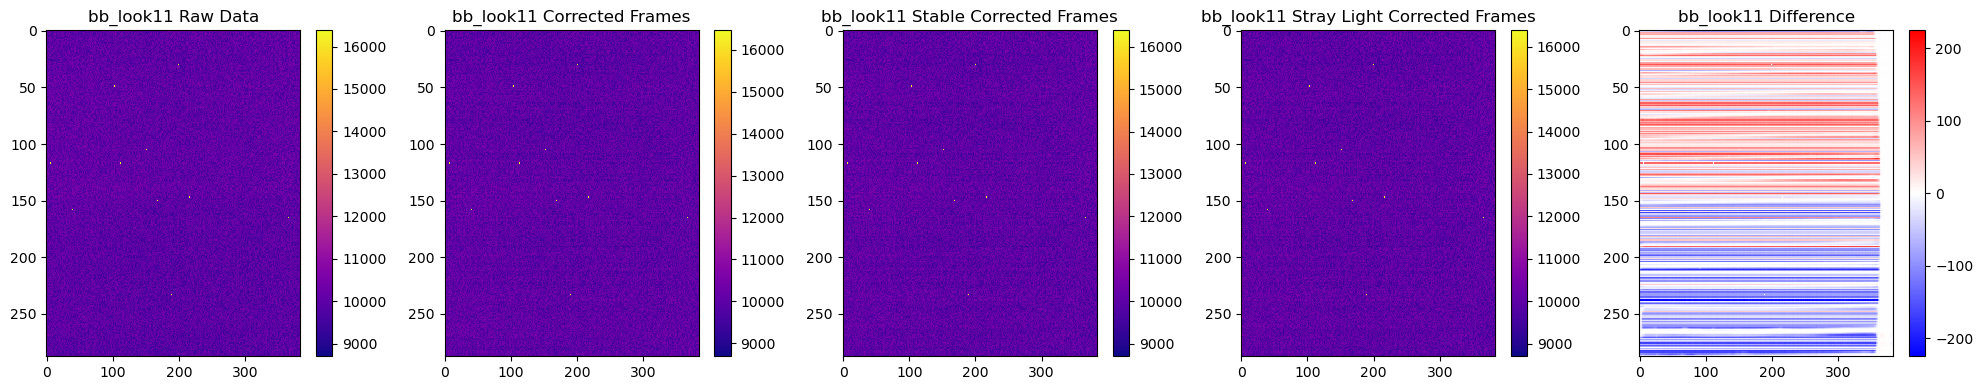

Plotting Cold Space Calibration Looks:



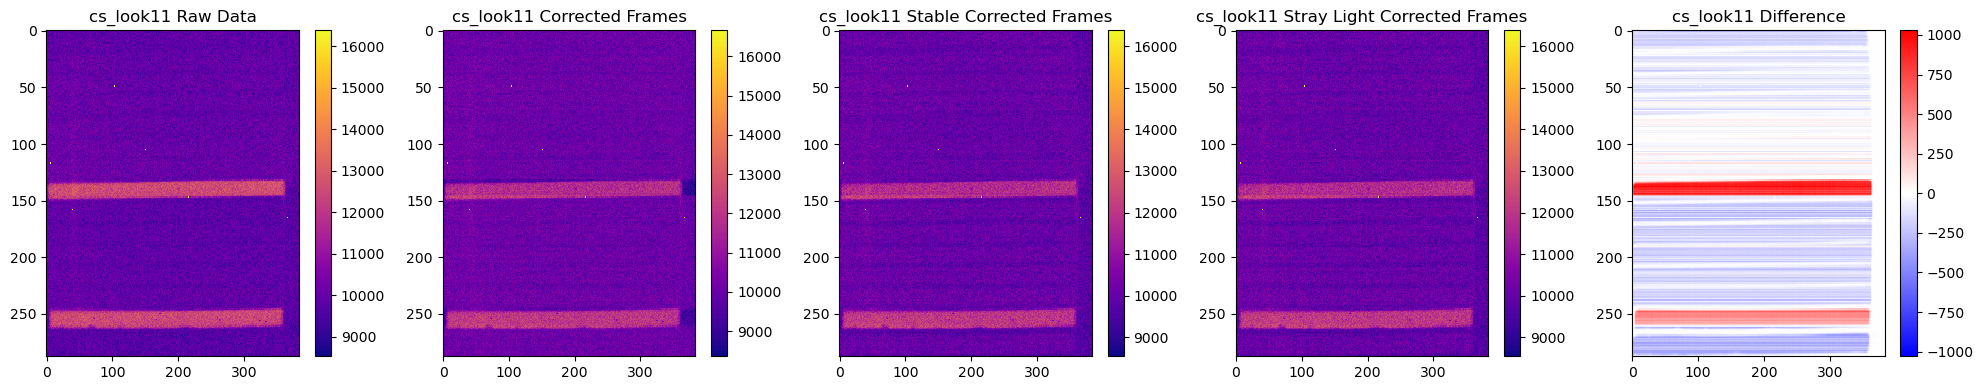

Plotting Scene Look:



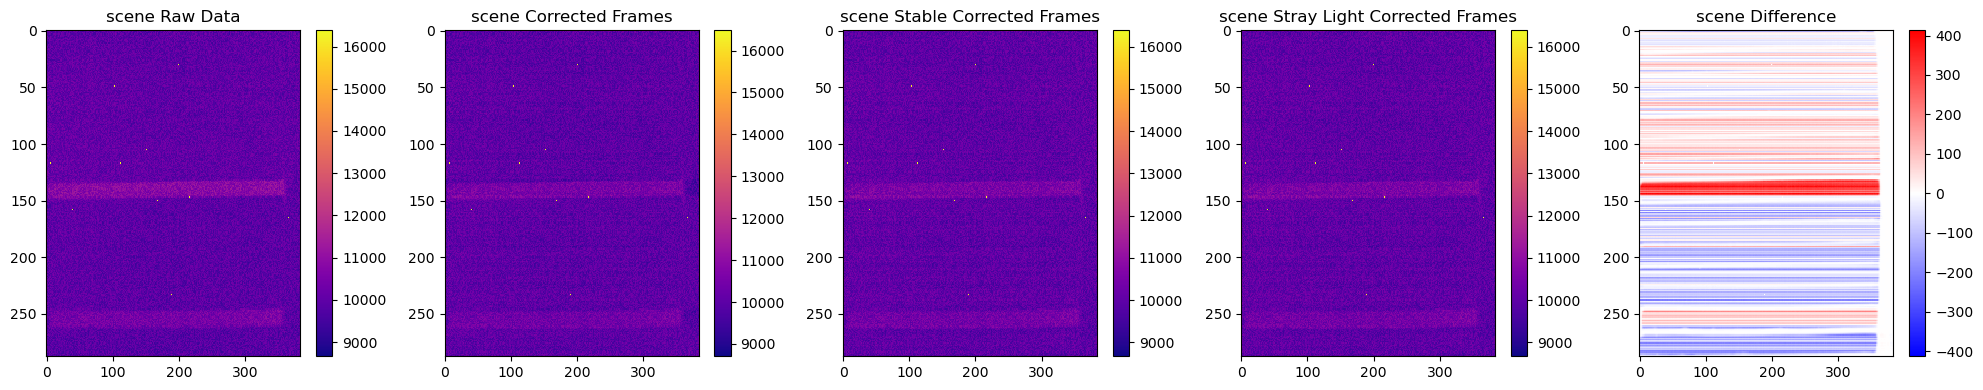

Plotting Calibrated Radiances:



/Users/nala/Library/CloudStorage/OneDrive-Nexus365/Oxford-LTM/LTM-Calibration/python-calibration/ltm_radcal.py:356: RuntimeWarning: divide by zero encountered in divide
  G_t = (V1 - V2) / (B1 - B2)
/Users/nala/Library/CloudStorage/OneDrive-Nexus365/Oxford-LTM/LTM-Calibration/python-calibration/ltm_radcal.py:356: RuntimeWarning: invalid value encountered in divide
  G_t = (V1 - V2) / (B1 - B2)
/Users/nala/Library/CloudStorage/OneDrive-Nexus365/Oxford-LTM/LTM-Calibration/python-calibration/ltm_radcal.py:357: RuntimeWarning: invalid value encountered in multiply
  A_t = V2 - G_t * B2
/Users/nala/miniconda3/envs/ltm/lib/python3.12/site-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Processing Int - bb_look11: shape (16, 288, 384)
Processing Cold - cs_look11: shape (16, 288, 384)
Processing Hot - scene: shape (16, 288, 384)


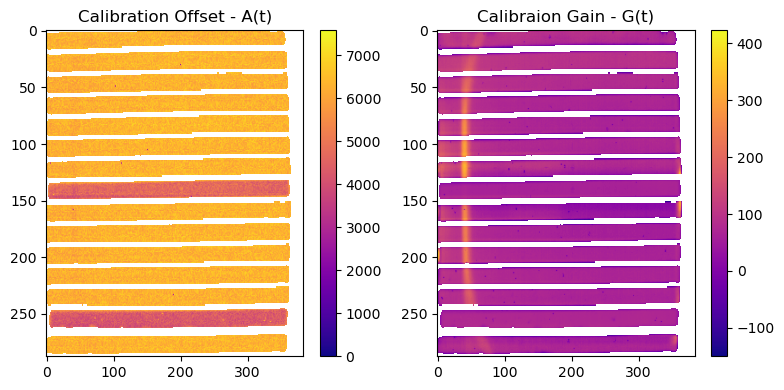

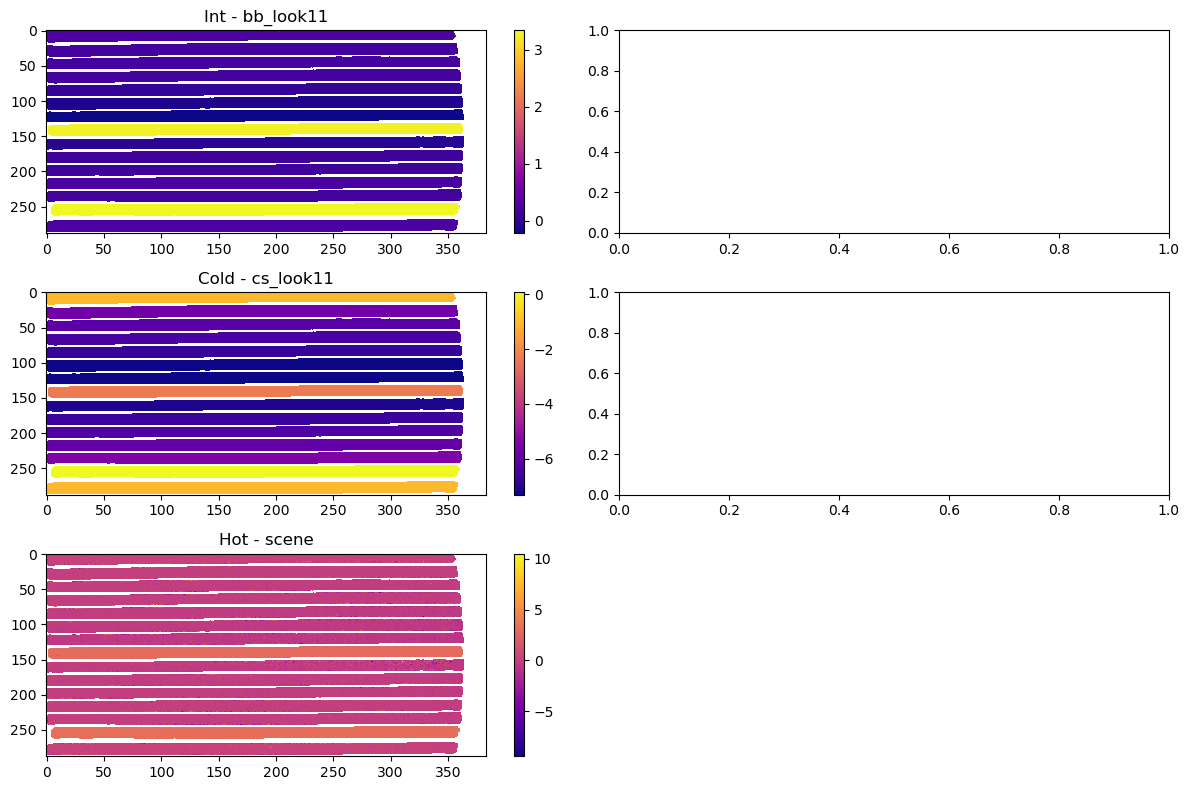

In [1]:
from ltm_model import LTM_Model
from ltm_radcal import RadCal

file_path = './ltm-calibration-data/ltm-cal-ext-10.h5' 
# file_path = 'ltm-simulated-data/pre-svt-ride-along.hdf5'

# Initialize RadCal object & LTM model:
radcal = RadCal()
model = LTM_Model()
iframe = 0              # Frame index to plot
mask_ind = 350          # Mask index --> where masked pixels begin

if 'ltm-cal-ext' in file_path:
    calibration_flag = True
else:
    calibration_flag = False

# Load data from HDF5 file
radcal.load_data(file_path, calibration_flag=calibration_flag)

# Apply row correction 
radcal.apply_row_correction(mask_ind=mask_ind)

print("Plotting Internal Calibration Looks:\n")
radcal.plot_corrected_data('Int', iframe)  

print("Plotting Cold Space Calibration Looks:\n")
radcal.plot_corrected_data('Cold', iframe)  

print("Plotting Scene Look:\n")
radcal.plot_corrected_data('Hot', iframe)  

# Calculated calibrated radiances using the model
print("Plotting Calibrated Radiances:\n")
radcal.calc_calibrated_radiance(model, calibration_flag=calibration_flag)
radcal.plot_calibrated_radiance(iframe, plot_log=True)


In [ ]:
import numpy as np
from scipy import interpolate

# Assuming LTM_Model is already loaded and initialized as 'LTM'

# Step 1: Get the scene temperature
sceneTemp = radcal.calibrated_products['Hot']

# Step 2: Calculate dRdT (the derivative of radiance with respect to temperature)
dRdT = (self.calcRadiance(np.arange(1, 16), sceneTemp + 0.01) - 
        self.calcRadiance(np.arange(1, 16), sceneTemp)) / 0.01

# Step 3: Initialize temperature and NETD frames (384x288 pixels)
tempFrame = np.zeros((384, 288))
nedtFrame = np.zeros((384, 288))

# Step 4: Loop through each channel (1 to 15)
for iChannel in range(15):
    # Step 4a: Create pixel mask (values > 0.2)
    pixelMask = RadCal_Index['ChannelMap'][:, :, iChannel] > 0.2
    
    # Step 4b: Apply pixel mask to R3 and get the radiometric data for this channel
    radSubFrame = R3[iChannel, :, :] * pixelMask
    
    # Step 4c: Interpolate radiance to get temperature (equivalent to 'interp1' in MATLAB)
    radInversion = Instr['radInversion'][iChannel, :]  # Retrieve radInversion data for the channel
    interp_func = interpolate.interp1d(radInversion, np.arange(1, 401), kind='linear', fill_value="extrapolate")
    tempSubFrame = interp_func(radSubFrame.flatten()).reshape(384, 288)
    
    # Step 4d: Handle NaN values from interpolation
    tempSubFrame[np.isnan(tempSubFrame)] = 0
    
    # Step 4e: Add temperature for this channel to the overall temperature frame
    tempFrame += tempSubFrame
    
    # Step 4f: Calculate NEDT (Noise Equivalent Delta Temperature) for the channel
    nedtSubFrame = (RadCal_Index[iCal]['Cal']['NER'] * pixelMask) / dRdT[self.channelFilterMap[iChannel]]
    nedtFrame += nedtSubFrame

# Example usage
# Assuming R3 and RadCal_Index are defined, and Instr is available with 'radInversion' data:
tempFrame, nedtFrame = LTM.calculate_temperature_and_nedt(R3, RadCal_Index, Instr, iCal)


In [ ]:
model.calculate_radiance_and_noise()
model.plotcalcRadiances()
model.plotNETD()
model.plotPower()
model.plotSNR()
model.plotTransmissions()

In [27]:
import scipy.io as sio
import numpy as np

mat_data = sio.loadmat('./calibration-tables/RadCalIndex.mat')
channel_map = mat_data['RadCal_Index']['ChannelMap'][0,0].T

T1 = radcal.temps['Int']['bb_look11']
T2 = radcal.temps['Cold']['cs_look11']

B1 = model.calcRadiance(model.channelFilterMap, [T1]) 
B2 = model.calcRadiance(model.channelFilterMap, [T2]) 

b1_radframe = np.zeros((288, 384))
b2_radframe = np.zeros((288, 384))

for i in range(15):
    ChannelMask  = channel_map[i,:,:] > 0.5
    b1_radframe[ChannelMask] = B1[i]
    b2_radframe[ChannelMask] = B2[i]

# Get the row corrected frames for each view (V1, V2) - Calibration campaign data only has 1 int & bb view:
V1 = 2**14 - radcal.row_corrected_data['Int']['bb_look11']['stableCorFrames']
V2 = 2**14 - radcal.row_corrected_data['Cold']['cs_look11']['stableCorFrames']

G_t = (V1 - V2) / (b1_radframe - b2_radframe)
A_t = V2 - G_t * b2_radframe
R3  = ((2**14 - radcal.row_corrected_data['Hot']['scene']['stableCorFrames']) - A_t) / G_t



/var/folders/nk/z5_gj71x57l61z36yk35t7p80000gn/T/ipykernel_5881/2709441425.py:25: RuntimeWarning: divide by zero encountered in divide
  G_t = (V1 - V2) / (b1_radframe - b2_radframe)
/var/folders/nk/z5_gj71x57l61z36yk35t7p80000gn/T/ipykernel_5881/2709441425.py:25: RuntimeWarning: invalid value encountered in divide
  G_t = (V1 - V2) / (b1_radframe - b2_radframe)
/var/folders/nk/z5_gj71x57l61z36yk35t7p80000gn/T/ipykernel_5881/2709441425.py:26: RuntimeWarning: invalid value encountered in multiply
  A_t = V2 - G_t * b2_radframe


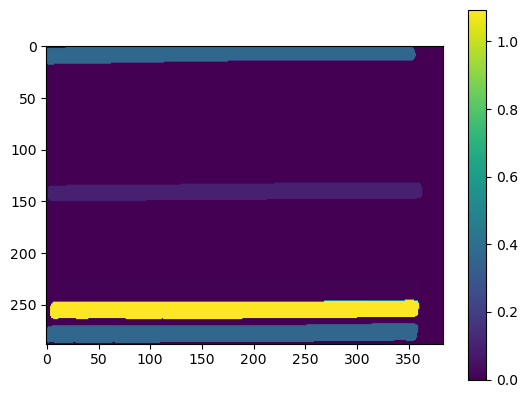

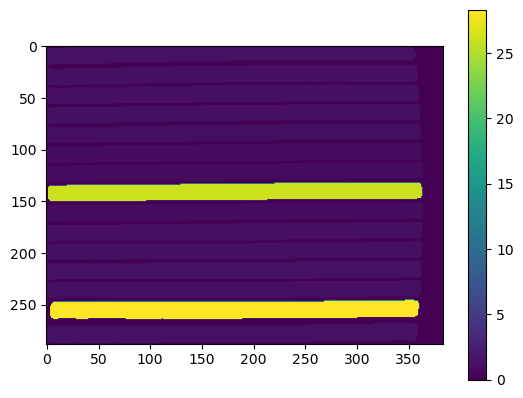

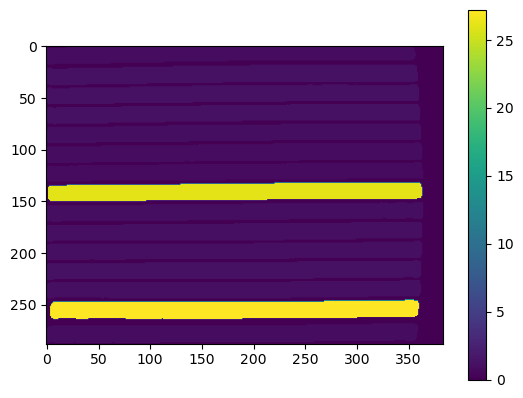

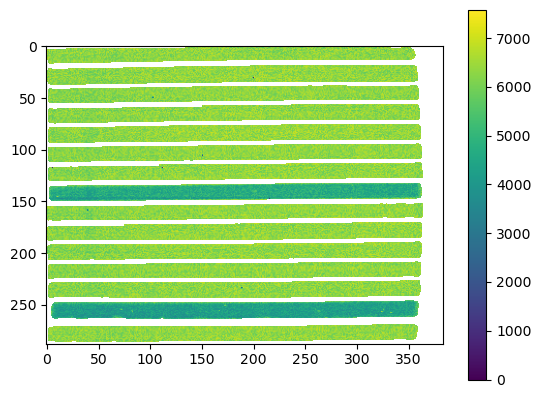

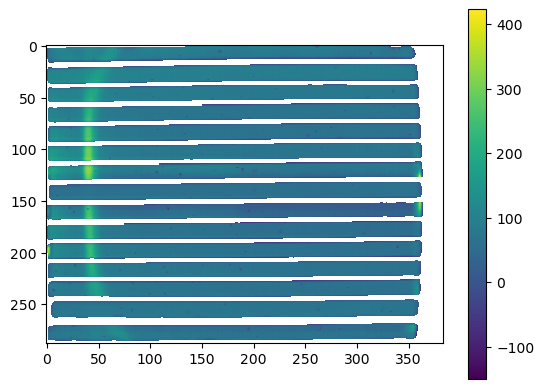

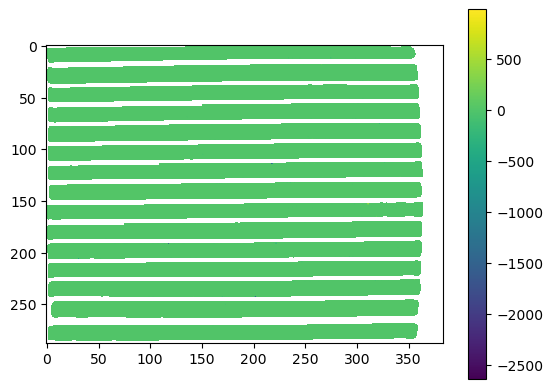

In [28]:
import matplotlib.pyplot as plt

ax = plt.imshow(b2_radframe)
plt.colorbar(ax)
plt.show()

ax = plt.imshow(b1_radframe)
plt.colorbar(ax)
plt.show()

ax = plt.imshow(b1_radframe - b2_radframe)
plt.colorbar(ax)
plt.show()

ax = plt.imshow(np.mean(A_t, axis=0))
plt.colorbar(ax)
plt.show()

ax = plt.imshow(np.mean(G_t, axis=0))
plt.colorbar(ax)
plt.show()

ax = plt.imshow(np.mean(R3, axis=0))
plt.colorbar(ax)
plt.show()

In [29]:
R3

array([[[          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [   1.18247617,    3.77686506,    1.29539371, ...,
                   nan,           nan,           nan],
        ...,
        [          nan,    1.07479836,    0.12138609, ...,
                   nan,           nan,           nan],
        [          nan,           nan,    1.04023287, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan]],

       [[          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [  -2.19181058,    1.41661663,    1.24683777, ...,
              

In [15]:
test = [3.96632598095979,	1.20712909712540,	1.18147841576364,	1.20204857385622,	1.04845795906584,	0.901648290792778,	0.810770120977757,	26.1909978935860,	0.961131097710972,	1.13724571610802,	1.11663437837887,	1.23976826612355,	1.16837374963075,	28.3089104838982,	0.969390576311952]

In [20]:
B1 == test

True

In [ ]:
compare gain & offset talbe, stablecoravg & radiance (R3)